# Seaborn 包全解析：基于 Matplotlib 的高级可视化工具
Seaborn 是 Python 生态中**基于 Matplotlib 开发的高级数据可视化库**，核心定位是“简化统计图表绘制流程，提升图表美观度”。它通过封装 Matplotlib 的底层接口，提供更简洁的 API 和更现代化的默认样式，同时深度兼容 Pandas、NumPy 等数据结构，让用户无需复杂代码就能生成专业级的统计可视化图表。


## 一、Seaborn 核心定位与价值
Seaborn 并非替代 Matplotlib，而是作为其“补充与增强工具”存在，核心价值体现在以下 4 个方面：

1. **降低统计绘图门槛**  
   针对常见统计场景（如分布分析、相关性分析、分类对比）提供专用函数（如 `sns.histplot()` 画分布、`sns.boxplot()` 画箱线图），无需手动处理数据分组、标签对齐等细节，一行代码即可生成结构化图表。

2. **默认风格更美观现代**  
   自带一套经过优化的配色方案和图表样式，默认生成的图表（如折线图、柱状图）比 Matplotlib 更具视觉吸引力，无需额外调整字体、颜色、边框等参数。

3. **深度兼容数据科学生态**  
   可直接接收 Pandas DataFrame、NumPy 数组作为输入，无需手动转换数据格式；同时支持 Scipy、Statsmodels 等统计库的分析结果可视化，方便从“数据处理→统计分析→图表呈现”形成闭环。

4. **支持复杂多子图布局**  
   提供 `sns.FacetGrid()`、`sns.JointGrid()` 等工具，可快速实现“按类别拆分多子图”“联合分布与边际分布同屏展示”等复杂布局，比 Matplotlib 手动调参更高效。


## 二、Seaborn 风格管理：控制图表整体视觉
Seaborn 提供灵活的风格管理功能，通过预设主题和自定义配置，可快速统一图表的视觉风格，核心工具是 `sns.set_style()` 方法。


### 2.1 五种预设绘图风格
Seaborn 内置 5 种常用风格，覆盖不同使用场景（如论文、报告、演示文稿），默认风格为 `darkgrid`。

| 风格名称       | 特点                                  | 适用场景                                  |
|----------------|---------------------------------------|-------------------------------------------|
| `darkgrid`     | 深色背景 + 浅色网格线                 | 突出数据趋势（如折线图、散点图），网格线辅助读数 |
| `whitegrid`    | 白色背景 + 灰色网格线                 | 通用场景，尤其适合柱状图、箱线图等分类对比图表 |
| `dark`         | 纯深色背景（无网格线）                | 强调数据本身（如复杂多子图、高对比度场景）    |
| `white`        | 纯白背景（无网格线）                  | 简洁风格需求（如期刊论文、正式报告）          |
| `ticks`        | 纯白背景 + 仅在坐标轴两端添加刻度线   | 极简风格，适合需要突出坐标轴范围的场景        |


### 2.2 风格使用方法
通过 `sns.set_style(style_name)` 可全局设置图表风格，设置后后续所有 Seaborn 图表都会沿用该风格；也可通过 `with` 语句临时指定风格（仅在代码块内生效）。

#### 示例 1：全局设置风格为 `whitegrid`
```python
import seaborn as sns
import matplotlib.pyplot as plt

# 全局设置绘图风格
sns.set_style("whitegrid")

# 后续绘制的图表都会使用 whitegrid 风格
tips = sns.load_dataset("tips")  # 加载 Seaborn 内置数据集
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()
```

#### 示例 2：临时使用 `dark` 风格
```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

# 仅在 with 代码块内使用 dark 风格
with sns.axes_style("dark"):
    sns.scatterplot(x="total_bill", y="tip", data=tips)
    plt.show()

# 代码块外仍使用默认风格（darkgrid）
sns.barplot(x="sex", y="total_bill", data=tips)
plt.show()
```


### 2.3 风格细节自定义
若预设风格无法满足需求，可通过 `sns.set_style()` 的 `rc` 参数自定义细节（如网格线颜色、字体大小、坐标轴样式），参数格式与 Matplotlib 的 `rcParams` 一致。

#### 示例：自定义网格线颜色和字体大小
```python
import seaborn as sns

# 自定义风格：灰色网格线（#CCCCCC）、12号字体
sns.set_style("whitegrid", rc={
    "grid.color": "#CCCCCC",  # 网格线颜色
    "font.size": 12,          # 全局字体大小
    "axes.labelsize": 14,     # 坐标轴标签字体大小
    "xtick.labelsize": 10,    # x轴刻度字体大小
    "ytick.labelsize": 10     # y轴刻度字体大小
})
```


## 三、Seaborn 与 Matplotlib 的核心区别
很多用户会混淆两者的定位，下表清晰对比了两者的核心差异：

| 维度               | Seaborn                              | Matplotlib                          |
|--------------------|--------------------------------------|-------------------------------------|
| 定位               | 高级统计可视化工具（简化流程）       | 底层绘图库（灵活控制细节）          |
| 代码复杂度         | 一行代码实现复杂统计图表             | 需多步调参（如子图、颜色、标签）    |
| 默认美观度         | 现代化默认样式，无需额外优化         | 基础样式较朴素，需手动美化          |
| 数据兼容性         | 原生支持 Pandas DataFrame            | 需手动转换为数组格式                |
| 适用场景           | 快速生成统计图表（分析报告、探索性分析） | 定制化图表（海报、论文封面、复杂布局） |

简单来说：**日常数据分析用 Seaborn 提效，需要极致定制化用 Matplotlib 调参**，两者可配合使用（如用 Seaborn 画图表主体，用 Matplotlib 调整标题、图例位置）。


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #加载seaborn包
mpl.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.rcParams['axes.unicode_minus']=False #让负号正常显示


d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40664 (\N{CJK UNIFIED IDEOGRAPH-9ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35748 (\N{CJK UNIFIED IDEOGRAPH-8BA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


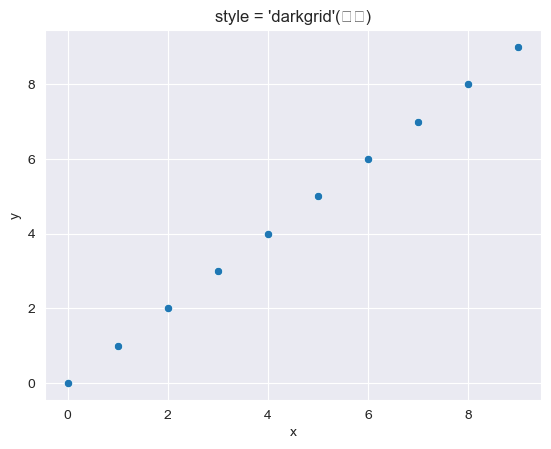

In [2]:
# 认识Seaborn的五种绘图风格

# 创建示例数据
df = pd.DataFrame({'x': range(10), 'y': range(10)})

# 1. darkgrid风格（默认）
sns.set_style('darkgrid')  # 设置风格
plt.title("style = 'darkgrid'(默认)")  # 设置标题（用matplotlib的plt.title）
# 用关键字参数x、y指定列名（Seaborn新版强制要求）
# 课件中直接使用sns.scatterplot('x','y',data=df)
# 会报错
sns.scatterplot(x='x', y='y', data=df)
plt.show()



### 问题1：这里发现前面设置的 Matplotlib 的字体配置失效了？

这是因为Seaborn 在设置风格时，可能会重置字体相关的参数，使得你之前设置的 mpl.rcParams['font.sans-serif']=['SimHei'] 失效。

解决方法：在 Seaborn 风格设置之后，重新配置中文字体
将字体设置代码放在 sns.set_style() 之后，确保字体配置不会被 Seaborn 的风格覆盖。
如下：

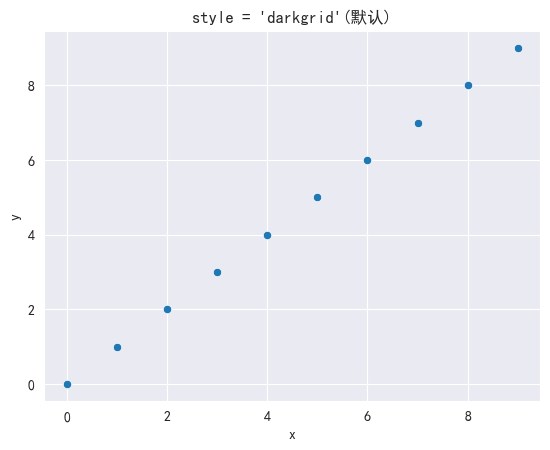

In [3]:
# 创建示例数据
df = pd.DataFrame({'x': range(10), 'y': range(10)})

# 1. darkgrid风格（默认）
sns.set_style('darkgrid')  # 设置风格
# 在Seaborn风格之后重新配置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 让负号正常显示
plt.title("style = 'darkgrid'(默认)")  # 设置标题
sns.scatterplot(x='x', y='y', data=df)
plt.show()


### 问题2：为什么没有plt.figure()创建画布这一步了？（了解即可）
Seaborn 是基于 Matplotlib 开发的 Python 数据可视化库，在绘图时**并非完全不需要创建画布**，只是它对 Matplotlib 进行了高级封装，在很多情况下会**自动帮用户创建画布和子图**，给人一种不需要手动创建 `figure` 的错觉 。以下是具体原因：

#### 1. 底层依赖Matplotlib并自动创建
Seaborn 的绘图函数（如 `scatterplot`、`lineplot`、`histplot` 等）底层是调用 Matplotlib 的绘图功能。当调用 Seaborn 函数绘图时，如果没有手动指定 `matplotlib.pyplot.figure`（即没有提前创建画布），Seaborn 会在函数内部自动调用 Matplotlib 的相关方法创建一个默认规格的画布（`figure`）和子图（`axes`） 。

比如使用 `sns.scatterplot` 绘制散点图：
```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 加载示例数据
tips = sns.load_dataset("tips") 

# 不手动创建画布，直接使用seaborn绘图
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()
```
在上述代码中，虽然没有显式地使用 `plt.figure()` 创建画布，但 `sns.scatterplot` 会在内部自动创建，使得图表能正常显示。

#### 2. 为了简化绘图流程
Seaborn 的设计目标之一是让数据可视化变得更简单、高效，尤其是对于进行统计分析可视化的用户。自动创建画布和子图减少了用户需要编写的代码量，用户可以专注于数据和图表类型本身，而无需每次都手动处理画布和子图的创建、设置等基础操作。

例如，当需要绘制多个图表时，在 Matplotlib 中可能需要多次创建画布和子图，并合理设置它们的布局，代码相对繁琐：
```python
import matplotlib.pyplot as plt
import seaborn as sns

# 加载示例数据
tips = sns.load_dataset("tips")

# 创建 1 行 2 列的子图布局，画布大小 12x4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 在第一个子图（ax1）上画散点图
sns.scatterplot(x="total_bill", y="tip", data=tips, ax=ax1)
ax1.set_title("消费金额与小费的关系")  # 子图标题

# 在第二个子图（ax2）上画箱线图
sns.boxplot(x="day", y="total_bill", data=tips, ax=ax2)
ax2.set_title("不同日期的消费金额分布")  # 子图标题

# 设置画布全局标题
fig.suptitle("餐厅消费数据可视化", fontsize=15)

plt.tight_layout()  # 自动调整子图间距，避免重叠
plt.show()
```
而 Seaborn 提供了一些高级的绘图函数（如 `FacetGrid`、`PairGrid` 等）来处理多子图布局，在一定程度上简化了这个过程，在绘制单个图表时自动创建画布也符合其简化流程的理念。

#### 3. 与数据结构的整合
Seaborn 能很好地与 Pandas 的 `DataFrame` 数据结构配合。当传入 `DataFrame` 数据进行绘图时，Seaborn 可以根据数据的列名和结构，自动映射到相应的坐标轴和绘图元素上，同时自动创建合适的画布和子图来展示数据，进一步提升了绘图的便捷性 。

不过，在一些复杂的绘图场景中，比如需要对画布进行高度定制化（如设置画布大小、分辨率、背景颜色等），或者精确控制多个子图的布局时，还是需要手动使用 `matplotlib.pyplot.figure` 和 `subplots` 等函数来创建画布和子图，并将 `axes` 对象传递给 Seaborn 的绘图函数。例如：
```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips") 

# 手动创建画布和子图
fig, ax = plt.subplots(figsize=(8, 6)) 

# 将子图对象传递给seaborn绘图函数
sns.scatterplot(x="total_bill", y="tip", data=tips, ax=ax) 

plt.show()
```

总之，Seaborn 自动创建画布的机制提升了绘图效率，降低了使用门槛，但在特定需求下，手动创建画布依然是必要的。 

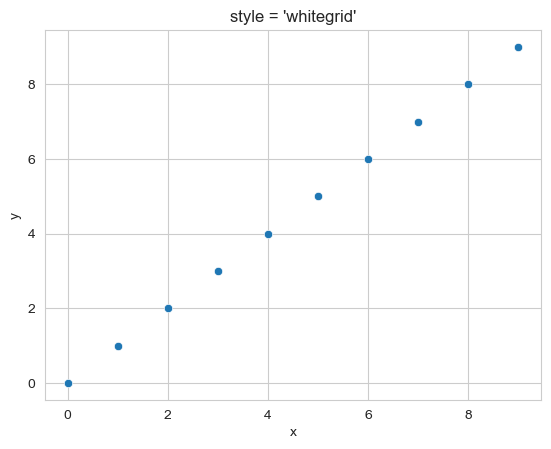

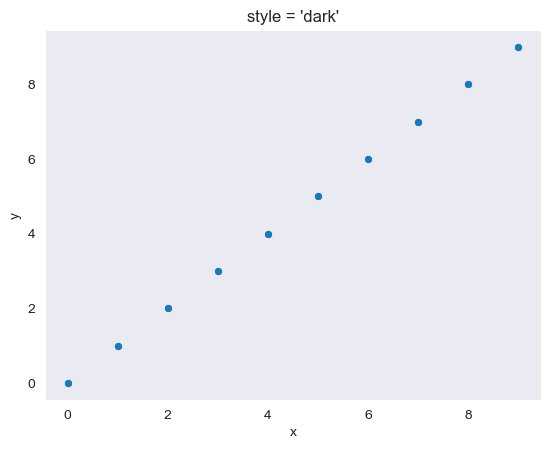

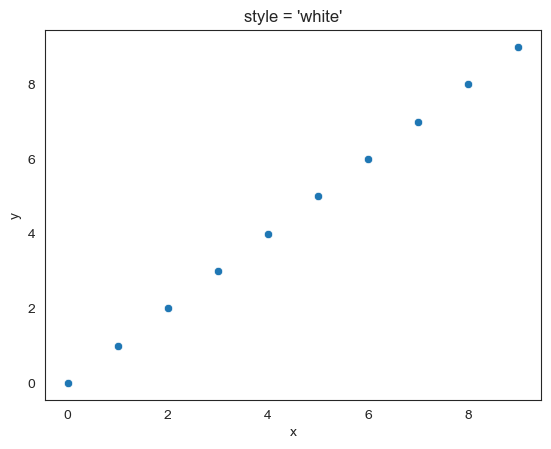

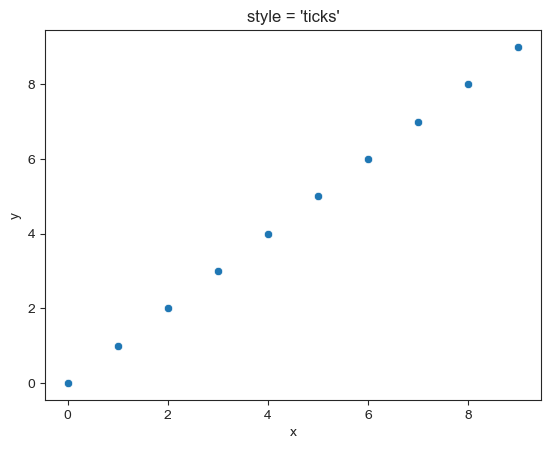

In [4]:
# 2. whitegrid风格
sns.set_style('whitegrid')  # 设置风格
plt.title("style = 'whitegrid'")  # 设置标题
sns.scatterplot(x='x', y='y', data=df)
plt.show()

# 3. dark风格
sns.set_style('dark')  # 设置风格
plt.title("style = 'dark'")  # 设置标题
sns.scatterplot(x='x', y='y', data=df)
plt.show()

# 4. wihte风格
sns.set_style('white')  # 设置风格
plt.title("style = 'white'")  # 设置标题
sns.scatterplot(x='x', y='y', data=df)
plt.show()

# 5. ticks风格
sns.set_style('ticks')  # 设置风格
plt.title("style = 'ticks'")  # 设置标题
sns.scatterplot(x='x', y='y', data=df)
plt.show()

### OK问题得到了解决！！！
未来使用seaborn绘图时会经常出现这种问题，记得排查

## 关系图（Relational plots）
Seaborn 中第一种类型的图就是 Relational plots（关系图）。

官网解释：“统计分析是理解数据集中变量如何相互关联以及这些关系如何依赖于其他变量的过程。可视化可能是这个过程的核心部分，因为当数据被正确地可视化时，人类视觉系统可以看到指示某种关系的趋势和模式。”

关系图中主要涉及三个 seaborn 函数：
- `scatterplot()`：散点图
- `lineplot()`：折线图
- `relplot()`：是一个图形级的高级函数，`kind='scatter'` 时（默认），与 `scatterplot()` 函数相同；`kind='line'` 时，与 `lineplot()` 函数相同。

**备注**：seaborn 需更新到最新版本（同时需要更新 numpy、scipy、pandas 等关联包），可使用 `pip install --upgrade 包名` 进行更新。

## 散点图

在 seaborn 中有几种（后面介绍）绘制散点图的方法，当两个变量都是数字时，应该使用的最基本的是 `scatterplot()` 功能。在 Categorical plots（分类图）中，也有使用散点图可视化分类数据的函数。

```python
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, markers=True, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None,……)
```

### 参数说明：
- **x, y**：需要传入的数据，一般为 dataframe 中的列；
- **hue**：某一用做分类的列，作用是分类；
- **data**：数据集，可选，一般是 dataframe；
- **style**：绘图的风格；
- **size**：绘图的大小；
- **palette**：调色板；
- **markers**：绘图的形状；
- **ci**：允许的误差范围（空值误差的百分比，0 - 100 之间），可为'sd'，则采用标准差（默认 95）；
- **n_boot (int)**：计算置信区间要使用的迭代次数；
- **alpha**：透明度；
- **x_jitter, y_jitter**：设置点的抖动程度。

In [5]:
mpg = pd.read_csv('mpg.csv')
print(mpg.head())
print(mpg.info())


     厂商  型号   马力  生产年份  油缸数    档位类型 驱动  每加仑城市里程  每加仑高速里程 燃料类型       车型
0  audi  a4  1.8  1999    4    auto  f       18       29    p  compact
1  audi  a4  1.8  1999    4  manual  f       21       29    p  compact
2  audi  a4  2.0  2008    4  manual  f       20       31    p  compact
3  audi  a4  2.0  2008    4    auto  f       21       30    p  compact
4  audi  a4  2.8  1999    6    auto  f       16       26    p  compact
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   厂商       234 non-null    object 
 1   型号       234 non-null    object 
 2   马力       234 non-null    float64
 3   生产年份     234 non-null    int64  
 4   油缸数      234 non-null    int64  
 5   档位类型     234 non-null    object 
 6   驱动       234 non-null    object 
 7   每加仑城市里程  234 non-null    int64  
 8   每加仑高速里程  234 non-null    int64  
 9   燃料类型     234 non-null    object 
 10  车型      

<Axes: xlabel='马力', ylabel='每加仑高速里程'>

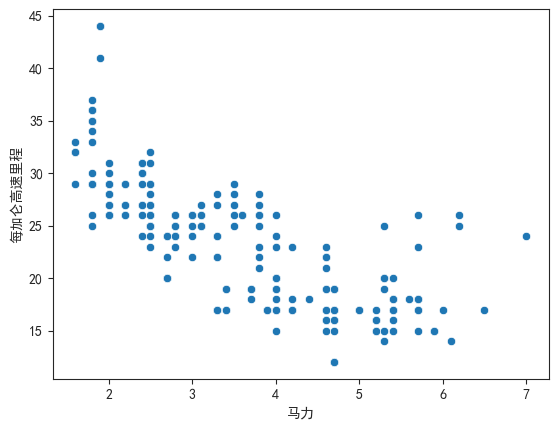

In [6]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 让负号正常显示
sns.scatterplot(x='马力',y='每加仑高速里程',data=mpg)


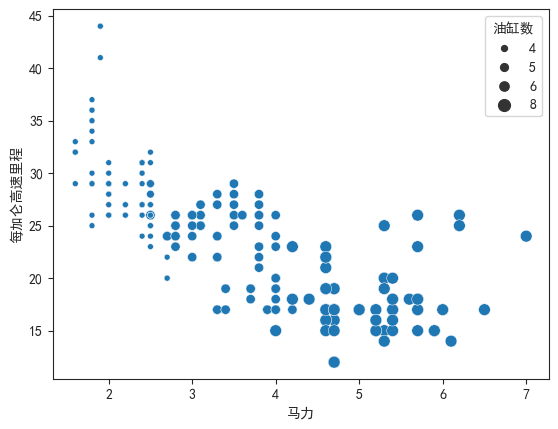

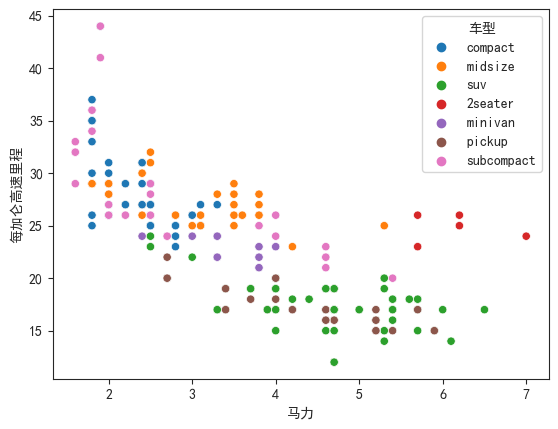

In [7]:
# 绘制散点图：x轴为“马力”，y轴为“每加仑高速里程”
# size='油缸数' 表示用点的大小区分不同“油缸数”的样本
# （油缸数越多，点越大，直观展示油缸数与其他两个变量的关系）
sns.scatterplot(x='马力', y='每加仑高速里程', data=mpg, size='油缸数')
plt.show()  # 显示当前图表

# 绘制另一幅散点图：x轴为“马力”，y轴为“每加仑高速里程”
# hue='车型' 表示用颜色区分不同“车型”的样本。hueing 着色、染色的意思
# （不同车型用不同颜色标记，便于观察车型对马力和油耗关系的影响）
sns.scatterplot(x='马力', y='每加仑高速里程', hue='车型', data=mpg)
plt.show()  # 显示当前图表

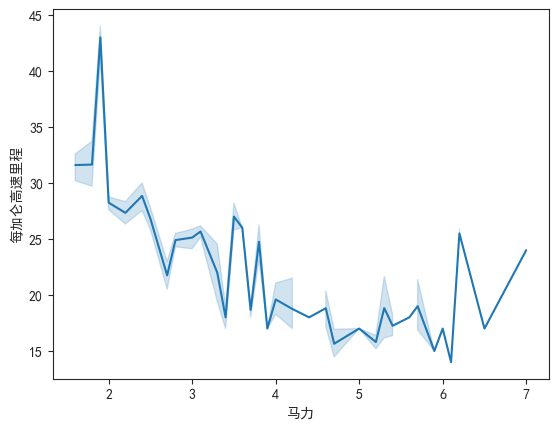

C:\Users\86178\AppData\Local\Temp\ipykernel_33656\176235482.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x='马力',y='每加仑高速里程',data=mpg,ci=0)


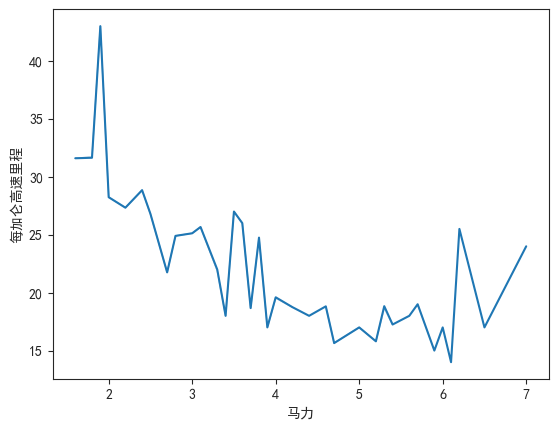

C:\Users\86178\AppData\Local\Temp\ipykernel_33656\176235482.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x='马力',y='每加仑高速里程',data=mpg,hue='车型',ci=0)


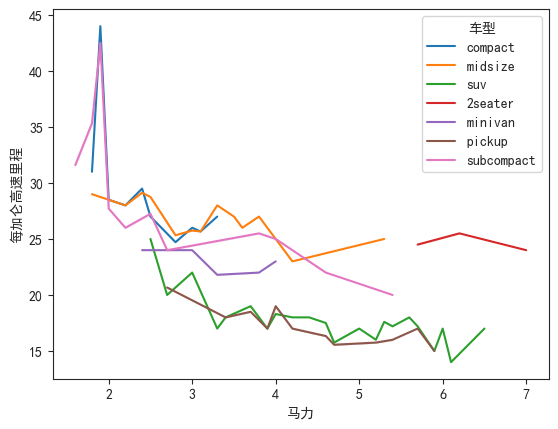

In [8]:
# 折线图
# 绘制折线图使用lineplot()函数，与scatterplot()函数参数一致。
sns.lineplot(x='马力',y='每加仑高速里程',data=mpg)
plt.show()
#阴影是默认的置信区间，可设置ci=0,将其去除
sns.lineplot(x='马力',y='每加仑高速里程',data=mpg,ci=0)
plt.show()
sns.lineplot(x='马力',y='每加仑高速里程',data=mpg,hue='车型',ci=0)
plt.show()

这个警告是由于使用了过时的 `ci` 参数，而该参数已经被弃用了。建议使用 `errorbar` 参数来指定误差栏的类型和样式。

以下是一个示例：

```python
import seaborn as sns
import pandas as pd

# 创建一个示例数据集
data = pd.DataFrame({'马力': [100, 120, 140], '每加仑高速里程': [10, 12, 14]})

# 使用 Seaborn 绘制带误差栏的线图
sns.lineplot(x='马力', y='每加仑高速里程', data=data, errorbar=('ci', 0))

# 显示图形
plt.show()
```

在这个示例中，我们使用 `errorbar=('ci', 0)` 参数来指定带误差栏的线图。

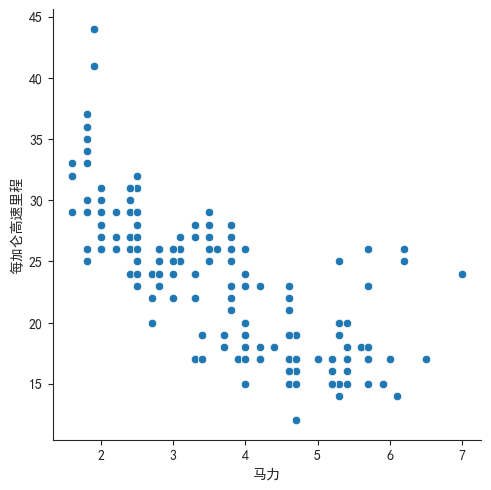

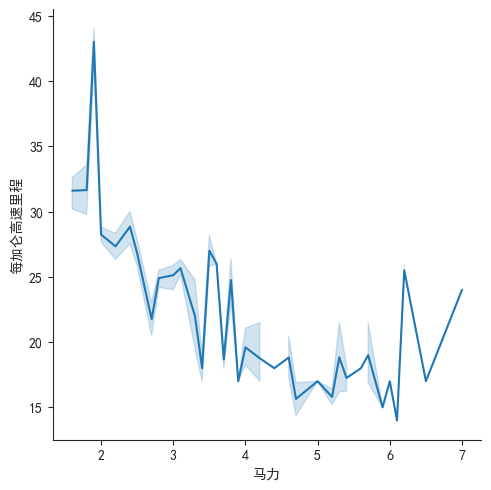

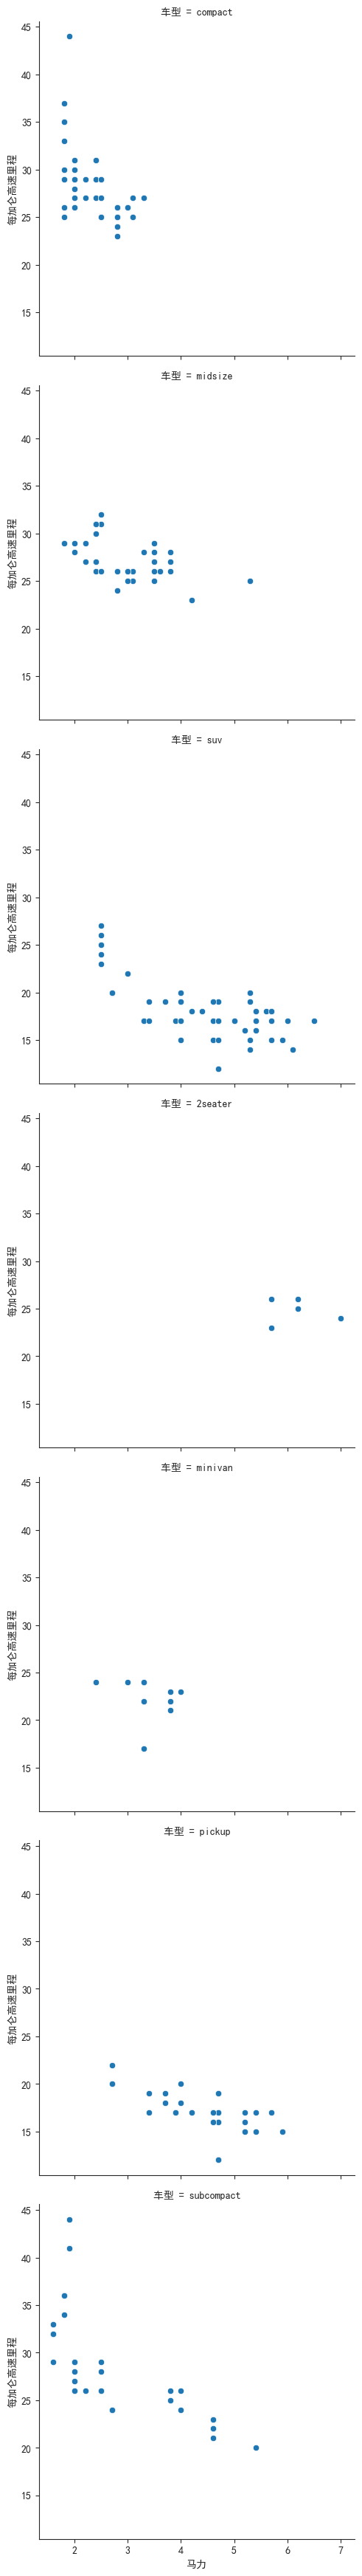

In [9]:
#  Seaborn关系图
# relplot()函数绘制关系图，可以看做是lineplot和scatterplot的归约，通过kind参数来指定画什么图形，
#其他重要参数如下：
# kind：默认scatter（散点图），也可以选择kind=‘line’（线图）；
# col、row：将决定网格的面数的分类变量

sns.relplot(x='马力',y='每加仑高速里程',data=mpg)

sns.relplot(x='马力',y='每加仑高速里程',data=mpg,kind='line')

sns.relplot(x='马力',y='每加仑高速里程',data=mpg, row='车型')


### 思考：为啥.relplot()可以自己创建多画布一个个输出，.lineplot()却只能显示最后一个？（了解即可）

因为 **`sns.relplot()` 和 `sns.lineplot()` 属于不同类型的函数**，前者是“图形级函数”，后者是“轴级函数”，两者的绘图机制不同，导致多图显示效果有差异。

### 核心原因：函数类型决定绘图行为
#### 1. `sns.relplot()` 是“图形级函数”（Figure-level）
- **特点**：每次调用都会**自动创建新的画布（`figure`）**，因此多个 `relplot()` 调用会生成多个独立的画布，最终显示多张图。
- 示例中：
  ```python
  sns.relplot(...)  # 创建画布1
  sns.relplot(...)  # 创建画布2
  sns.relplot(...)  # 创建画布3
  ```
  三个调用生成3个独立画布，所以显示3张图。


#### 2. `sns.lineplot()` 是“轴级函数”（Axes-level）
- **特点**：不会自动创建新画布，而是**默认绘制在当前活跃的画布/子图（`axes`）上**。如果不手动创建新画布，多次调用会将所有内容绘制在同一张画布上，最终只显示最后一次绘制的结果（或重叠显示，但通常被覆盖）。
- 示例中：
  ```python
  sns.lineplot(...)  # 绘制在默认画布上
  sns.lineplot(...)  # 覆盖到同一个画布上
  sns.lineplot(...)  # 再次覆盖，只显示这一次的结果
  ```
  三个调用共用一个默认画布，后一次绘制覆盖前一次，所以最终只显示最后一张图。


### 如何让轴级函数（如 `lineplot`）显示多张图？
需手动创建多个画布（用 `plt.figure()`）或多个子图，确保每次绘制在独立的画布上：

```python
# 方法1：每次绘图前创建新画布
sns.lineplot(x='马力', y='每加仑高速里程', data=mpg)
plt.show()  # 显示第一张图并关闭当前画布

sns.lineplot(x='马力', y='每加仑高速里程', data=mpg, ci=0)
plt.show()  # 显示第二张图

sns.lineplot(x='马力', y='每加仑高速里程', data=mpg, hue='车型', ci=0)
plt.show()  # 显示第三张图
```

```python
# 方法2：创建多子图布局（在一个画布上显示多张图）
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))  # 1行3列子图

sns.lineplot(x='马力', y='每加仑高速里程', data=mpg, ax=ax1)  # 指定子图1
ax1.set_title("默认折线图")

sns.lineplot(x='马力', y='每加仑高速里程', data=mpg, ci=0, ax=ax2)  # 指定子图2
ax2.set_title("无置信区间")

sns.lineplot(x='马力', y='每加仑高速里程', data=mpg, hue='车型', ci=0, ax=ax3)  # 指定子图3
ax3.set_title("按车型分类")

plt.tight_layout()  # 调整布局
plt.show()  # 一次性显示所有子图
```


### 总结
- **图形级函数（如 `relplot`、`catplot`）**：自动创建新画布，多次调用默认生成多张图。
- **轴级函数（如 `lineplot`、`scatterplot`）**：默认共用当前画布，需手动用 `plt.figure()` 或 `plt.show()` 分隔，才能显示多张图。

这是 Seaborn 设计上的区分，图形级函数更适合快速生成多图布局（如按 `row`/`col` 拆分），轴级函数更适合精细控制单图或嵌入多子图布局。

### 分类图（Categorical plots）

可以具体分为下面三种类型，8个小图：

#### 一、分类散点图
- 分布散点图：`stripplot()` 函数
- 分布密度散点图：`swarmplot()` 函数

#### 二、分类分布图
- 箱线图：`boxplot()` 函数
- 小提琴图：`violinplot()` 函数
- 增强箱型图：`boxenplot()` 函数

#### 三、分类估计图
- 点图：`pointplot()` 函数
- 条形图：`barplot()` 函数
- 计数统计图：`countplot()` 函数

`catplot()` 函数为高级绘图函数

### 分类散点图`stripplot()`函数
`stripplot()`函数，主要绘制分布散点图，语法如下：

```python
stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```

### 其他重要的参数说明
- **`order`**：用`order`参数进行筛选分类类别，例如：`order=['sun','sat']`；
- **`jitter`**：抖动项，表示抖动程度，可以是`float`，或者`True`；
- **`dodge`**：重叠区域是否分开，当使用`hue`时，将其设置为`True`，将沿着分类轴将不同色调级别的条带分开。
- **`orient`**：`"v"` | `"h"`，`vertical`（垂直）和`horizontal`（水平）的意思。


<Axes: xlabel='车型', ylabel='每加仑高速里程'>

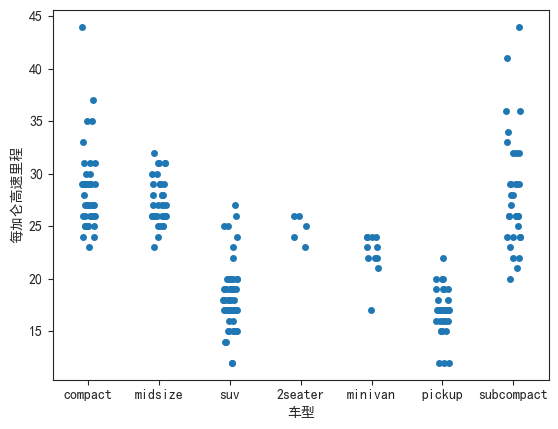

In [13]:
# 分类散点图stripplot()函数
sns.stripplot(x='车型',y='每加仑高速里程',data=mpg)


<Axes: xlabel='车型', ylabel='每加仑高速里程'>

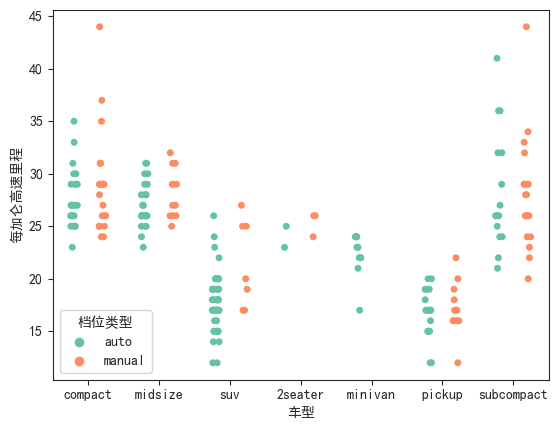

In [12]:
sns.stripplot(x='车型',y='每加仑高速里程',data=mpg,hue='档位类型',jitter=True,palette='Set2',dodge=True)

### 核心参数详解
假设完整代码为：
```python
sns.stripplot(
    x='车型',  # x轴：分类变量（如“轿车”“SUV”等）
    y='每加仑高速里程',  # y轴：数值变量（如油耗，单位：英里/加仑）
    data=mpg,  # 数据来源：mpg数据集（包含上述变量的DataFrame）
    hue='档位类型',  # 按“档位类型”（如手动挡、自动挡）用颜色区分数据点
    jitter=True,  # 开启抖动效果，避免数据点重叠
    palette='Set2',  # 指定调色板，定义不同“档位类型”的颜色
    dodge=True  # 当用hue分类时，让不同颜色的数据点沿x轴分开排列
)
plt.show()
```


#### （1）`x='车型'` 和 `y='每加仑高速里程'`
- **作用**：定义坐标轴的变量。  
- `x` 接收**分类变量**（如“车型”，包含离散的类别，如“紧凑型车”“中型车”等），决定数据点在水平方向的分组位置。  
- `y` 接收**数值变量**（如“每加仑高速里程”，即油耗，连续数值），决定数据点在垂直方向的高度。  
- **效果**：每个“车型”类别下，会有一系列对应油耗的数据点，直观看到不同车型的油耗分布（比如某车型的油耗普遍较高，某车型普遍较低）。


#### （2）`data=mpg`
- **作用**：指定绘图所用的数据集，必须是 Pandas 的 `DataFrame` 格式。  
- 这里的 `mpg` 是 Seaborn 自带的示例数据集（包含汽车的车型、油耗、档位类型等信息），`x`/`y`/`hue` 中的变量名必须是 `mpg` 中的列名。  


#### （3）`hue='档位类型'`
- **作用**：在基础分类（x轴的“车型”）上，再按“档位类型”（如“手动挡”“自动挡”）对数据点进行**二次分类**，并用不同颜色区分。  
- **效果**：同一个车型下的点，会根据“档位类型”呈现不同颜色，既能看到车型间的油耗差异，又能比较同一车型中不同档位的油耗区别（比如某车型的手动挡是否比自动挡更省油）。  


#### （4）`jitter=True`
- **作用**：解决数据点重叠问题。  
- 当多个数据点的 `x` 和 `y` 值接近时（比如同一车型、同一油耗的车有多个），点会重叠在一起，看不清数量和分布。  
- `jitter=True` 会让数据点在 `x` 轴方向（分类轴）轻微随机抖动，分散重叠的点，更清晰地展示数据的密集程度。  
- 也可以设置具体数值（如 `jitter=0.2`）控制抖动幅度，值越大，分散越明显。  


#### （5）`palette='Set2'`
- **作用**：指定颜色方案（调色板），定义 `hue` 分类的颜色。  
- Seaborn 内置了多种调色板（如 `Set2`、`husl`、`pastel` 等），不同调色板的颜色搭配和对比度不同。  
- **效果**：`Set2` 是一种柔和且区分度较高的调色板，能让不同“档位类型”的颜色既不刺眼又容易区分，避免因颜色相近导致混淆。  


#### （6）`dodge=True`
- **作用**：当使用 `hue` 进行二次分类时，让不同颜色的点沿 `x` 轴分开排列，避免在同一位置重叠。  
- 若 `dodge=False`（默认），同一车型下的不同“档位类型”的点会叠加在同一 `x` 位置（仅靠颜色区分），可能因重叠看不清。  
- `dodge=True` 会将同一车型下的不同“档位类型”的点在 `x` 轴方向错开一小段距离，形成“并列”效果，更清晰地对比同一车型内不同类别的分布。  


<Axes: xlabel='车型', ylabel='每加仑高速里程'>

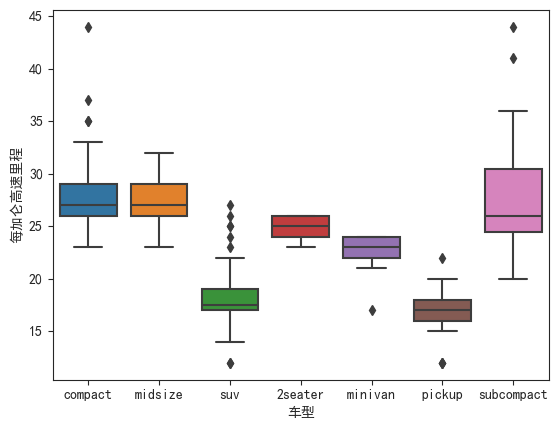

In [19]:
# 分类分布图（boxplot、 boxenplot 、 violinplot）
# 此三个函数的参数与前面的函数大部分一致，不同之处请查阅官方网站。
sns.boxplot(x='车型',y='每加仑高速里程',data=mpg)

<Axes: xlabel='车型', ylabel='每加仑高速里程'>

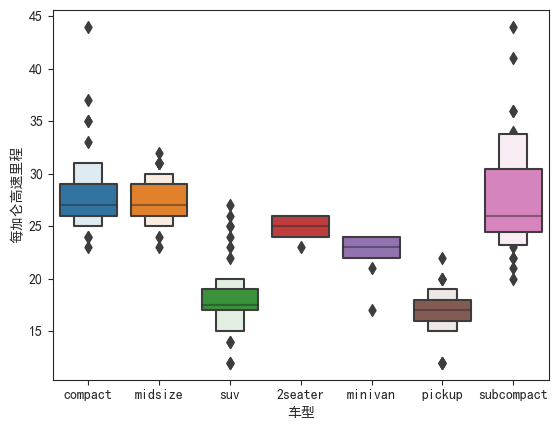

In [16]:
sns.boxenplot(x='车型',y='每加仑高速里程',data=mpg)


<Axes: xlabel='车型', ylabel='每加仑高速里程'>

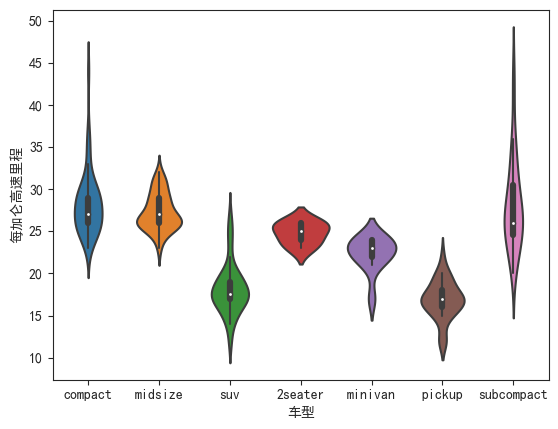

In [17]:
sns.violinplot(x='车型',y='每加仑高速里程',data=mpg)


<Axes: xlabel='车型', ylabel='每加仑高速里程'>

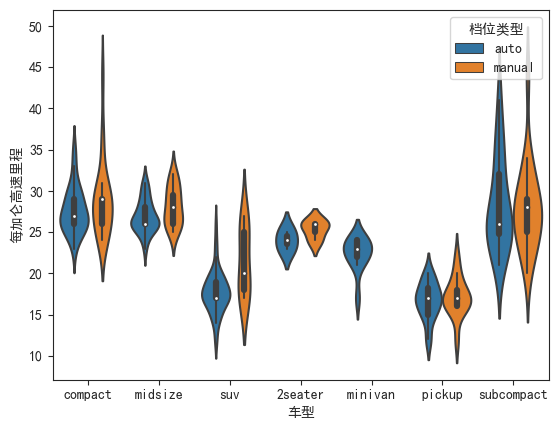

In [18]:
sns.violinplot(x='车型',y='每加仑高速里程',data=mpg,hue='档位类型')


d:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


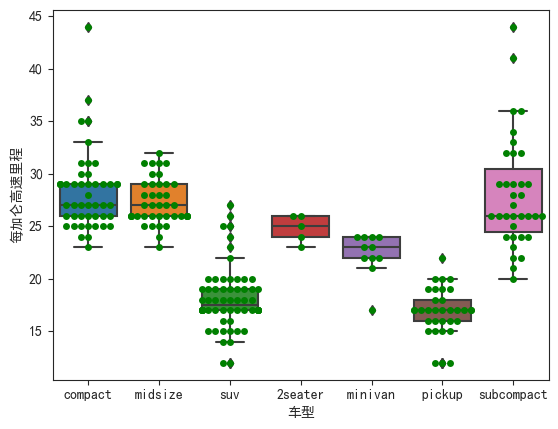

In [21]:
# 分类分布图（boxplot、 boxenplot 、 violinplot）
# 箱线图+散点图
ax=sns.boxplot(x='车型',y='每加仑高速里程',data=mpg)
ax=sns.swarmplot(x='车型',y='每加仑高速里程',data=mpg,color='g')


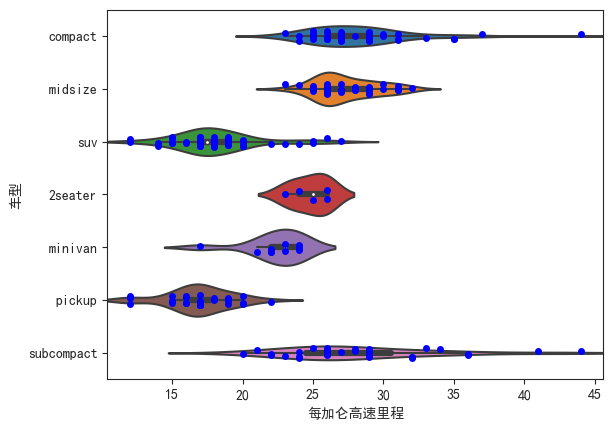

In [22]:
# 小提琴图+散点图
ax=sns.violinplot(x='每加仑高速里程',y='车型',data=mpg)
ax=sns.stripplot(x='每加仑高速里程',y='车型',data=mpg,color='b',jitter=True)


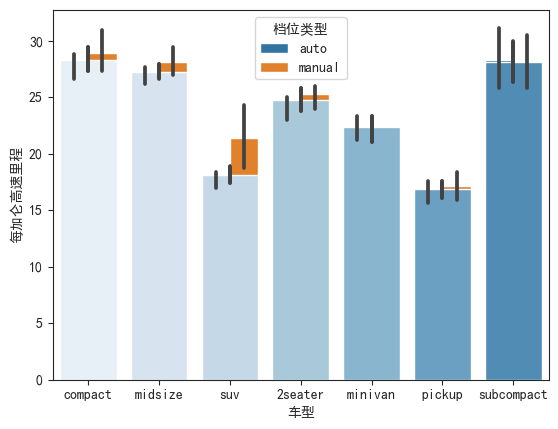

In [ ]:
# 分类估计图（barplot函数-柱状图）
ax=sns.barplot(x='车型',y='每加仑高速里程',data=mpg)


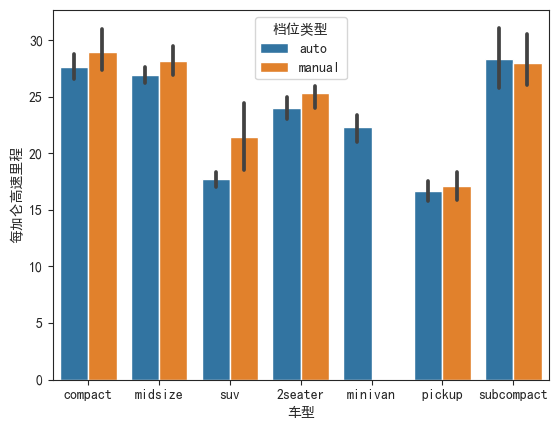

In [24]:
ax=sns.barplot(x='车型',y='每加仑高速里程',data=mpg,hue='档位类型')


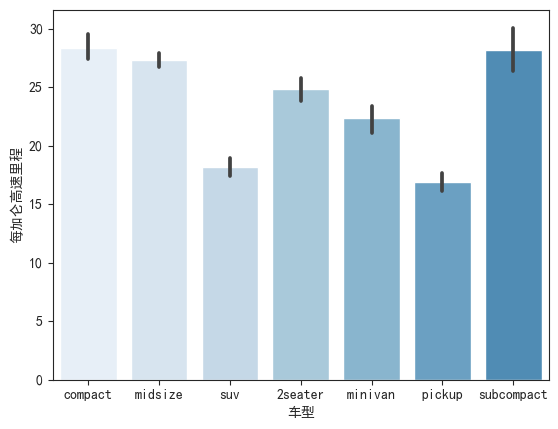

In [26]:
pa= sns.color_palette('Blues',10)
ax=sns.barplot(x='车型',y='每加仑高速里程',data=mpg,palette=pa)


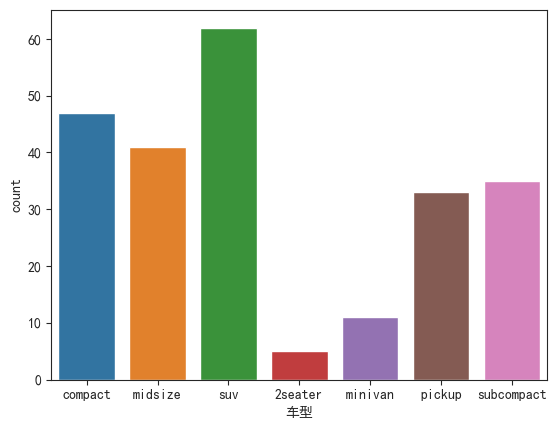

In [27]:
# 分类估计图（countplot函数-计数图）
ax=sns.countplot(x='车型',data=mpg)


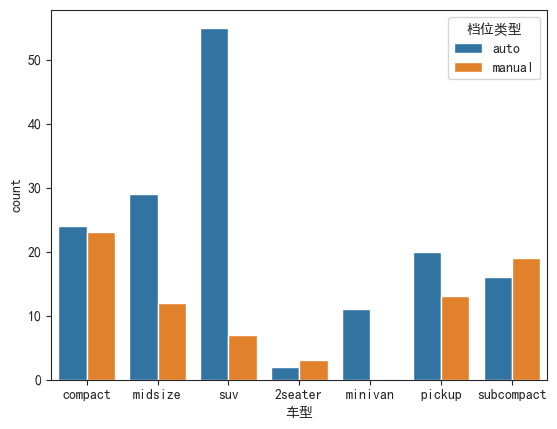

In [28]:
ax=sns.countplot(x='车型',data=mpg,hue='档位类型')


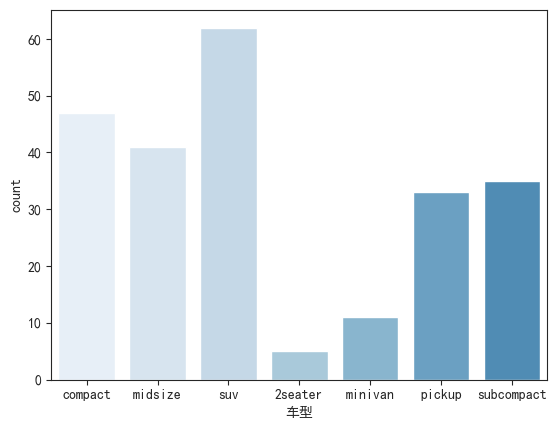

In [29]:
pa= sns.color_palette('Blues',10)
ax=sns.countplot(x='车型',data=mpg,palette=pa)


### 高级绘图函数`catplot()`
`catplot()`函数提供了对几个轴级函数的访问，这些函数使用几种可视化表示形式之一，即显示一个数字变量和一个或多个分类变量之间的关系。

`catplot()`函数利用`kind`参数来画前面Categorical plots（分类图）中的任意8个图形。其用法与`regplot`（关系图）的用法一致。

可选的`kind`如下：
"strip"，"swarm"，"box"，"violin"，"boxen"，"point"，"bar"，"count"。

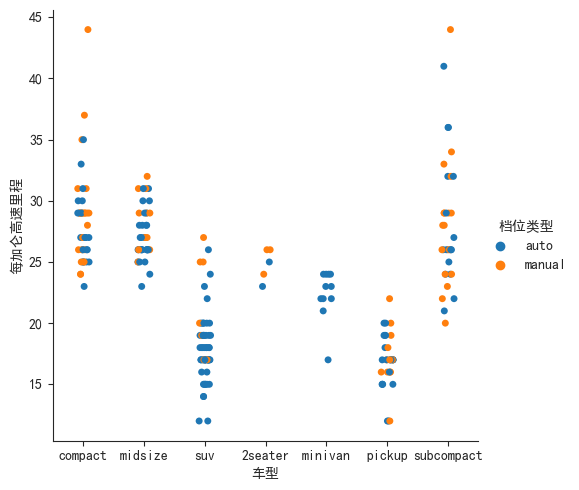

In [30]:
# 高级绘图函数catplot()
ax=sns.catplot(x='车型',y='每加仑高速里程',data=mpg,kind='strip',hue='档位类型')


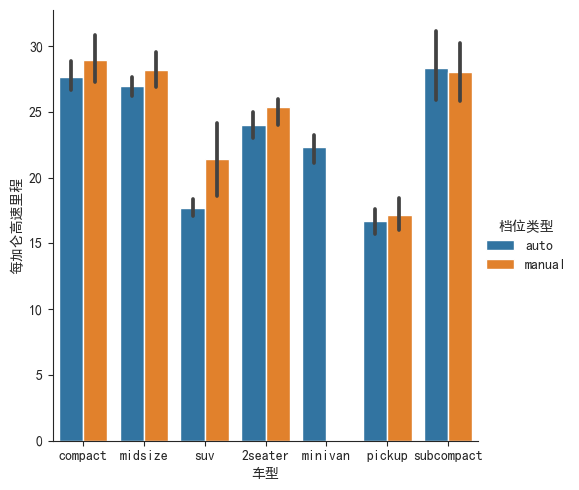

In [31]:
ax=sns.catplot(x='车型',y='每加仑高速里程',data=mpg,kind='bar',hue='档位类型')


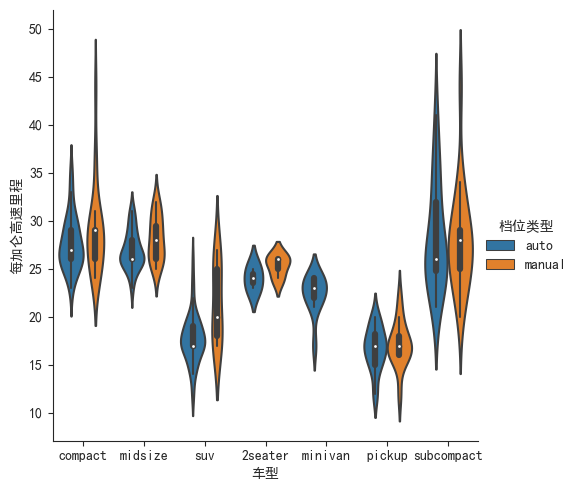

In [32]:
sns.catplot(x='车型',y='每加仑高速里程',data=mpg,kind='violin',hue='档位类型')


### distplot()

Seaborn中使用`distplot()`函数，既可以绘制直方图，也可以绘制核密度图，其语法如下：

```python
distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, color=None, vertical=False, norm_hist=False, axlabel=None, ……)
```

### 参数说明：
- **bins**：int或list，控制直方图的划分，设置矩形数量，除特殊要求一般默认；
- **hist**：是否显示方块；
- **kde**：是否显示核密度估计曲线；
- **rug**：控制是否生成观测数值的小细条；
- **fit**：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)；
- **norm_hist**：若为True，则直方图高度显示密度而非计数(含有kde图像中默认为True)；
- **vertical**：放置的方向，如果为真，则观测值位于y-轴上（默认False，x轴上）；
- **axlabel**：string, False, or None，设置标签。

C:\Users\86178\AppData\Local\Temp\ipykernel_33656\3984513351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mpg['每加仑高速里程'])
C:\Users\86178\AppData\Local\Temp\ipykernel_33656\3984513351.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mpg['每加仑高速里程'],kde=False)
C:\Users\86178\AppData\Local

<Axes: xlabel='每加仑高速里程', ylabel='Density'>

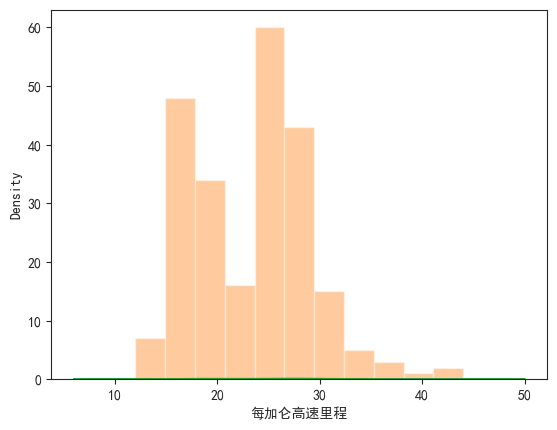

In [33]:
# distplot（直方图）
sns.distplot(mpg['每加仑高速里程'])
sns.distplot(mpg['每加仑高速里程'],kde=False)
sns.distplot(mpg['每加仑高速里程'],hist=False)


这个警告是因为 **`seaborn.distplot()` 函数已经被弃用（deprecated）**，在 Seaborn 0.14.0 及以后版本会被移除。Seaborn 官方推荐使用更现代的函数 `displot`（图形级函数，功能更灵活）或 `histplot`（轴级函数，专门用于绘制直方图）来替代。


### 如何替换 `distplot`？
根据你原本的需求（是否显示直方图、核密度估计等），选择对应的新函数：


#### 1. 同时显示直方图 + 核密度估计（类似 `distplot()` 默认行为）
用 **`sns.histplot()`** 并开启 `kde=True`：
```python
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 mpg 是你的数据集
sns.histplot(mpg['每加仑高速里程'], kde=True)
plt.show()
```


#### 2. 只显示直方图（对应 `distplot(..., kde=False)`）
用 **`sns.histplot()`** 并保持 `kde=False`（默认就是 `False`）：
```python
sns.histplot(mpg['每加仑高速里程'])
plt.show()
```


#### 3. 只显示核密度估计（对应 `distplot(..., hist=False)`）
用 **`sns.kdeplot()`**：
```python
sns.kdeplot(mpg['每加仑高速里程'])
plt.show()
```


#### 4. 更灵活的图形级函数（`displot`）
`displot` 是图形级函数，能通过 `kind` 参数切换绘图类型（直方图、核密度图等），适合需要统一管理画布和子图的场景：
```python
# 显示直方图 + 核密度估计
sns.displot(mpg['每加仑高速里程'], kde=True)
plt.show()

# 只显示直方图
sns.displot(mpg['每加仑高速里程'], kind="hist")
plt.show()

# 只显示核密度估计
sns.displot(mpg['每加仑高速里程'], kind="kde")
plt.show()
```


### 为什么要替换？
Seaborn 团队弃用 `distplot` 是为了让绘图函数的分工更明确：
- `histplot`：专注于绘制直方图，支持更多直方图定制（如分箱、堆积等）。
- `kdeplot`：专注于核密度估计。
- `displot`：作为图形级入口，统一管理不同类型的分布可视化，更易与 Seaborn 的其他高级功能（如 `FacetGrid`）结合。


替换后，警告会消失，且功能与原 `distplot` 一致（甚至更强大）。